# Conceitos Básicos de Estatística para Análise de Dados

O propósito deste notebook é exercítar os conceitos vistos na Unidade 6, Conceitos Básicos de Estatística para Análise de Dados. Para isso usaremos as ferramentas que já vimos em Python, tais como o NumPy e o Pandas, e veremos algumas novas.

## 1. Estimativas de Centralidade ou Localização

Para os exercícios desta parte usaremos um conjunto de dados bem conhecido chamado Iris Dataset. Este conjunto de dados contém informações sobre flores. O arquivo de dados contém os seguintes campos:

1. comprimento sepalar em cm
2. largura sepalar em cm
3. compimento petalar em cm
4. largura petalar em cm
5. classe:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginia

O arquivo pode ser obtido no [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris), selecionando-se o link `Data Folder`, e em seguida o arquivo `iris.data`. Apesar da extensão do arquivo ser `data`, ele é um arquivo csv.

Baixe o arquivo `iris.data` no seu diretório de trabalho antes de continuar.

Se você utiliza o sistema Linux, e tem o comando `wget` instalado, o comando abaixo deverá fazer o download do arquivo. Caso contrário, baixe o arquivo manualmente seguindo as instruções acima.

In [1]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

**Exercício.** Uma vez que você tenha baixado o arquivo, é hora de importar os dados para podermos trabalhar com eles. Complete o código Python abaixo para carregar o arquivo `iris.data` em um DataFrame utilizando Pandas, e exiba as primeiras linhas do dataset.

In [2]:
import numpy as np
import pandas as pd

# Crie um dataset chamado "iris" à partir do arquivo csv "iris.data" Lembre-se que este 
# arquivo de dados não possui uma linha de cabeçalho, portanto você deverá indicar isso 
# ao fazer a leitura e definir os nomes das colunas. Use os nomes "sepal_length", 
# "sepal_width", "petal_length", "petal_width" e "species".

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('iris.data', header=None, dtype={'a': np.float32, 'b': str})
iris.columns = cols

# Mostre as primeiras linhas do dataset "iris"
print(iris.head(3))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa


**Exercício.** Agora exiba a **quantidade de registros**, e os valores **mínimos** e **máximos** de cada uma das quatro primeiras colunas do dataset.

In [3]:
# Use a função len(df) para obter a quantidade de linhas, e os métodos min() e max() nas colunas.
iris_count = len(iris)
sepal_length_min = min(iris['sepal_length']) # iris['sepal_length'].min()
sepal_length_max = max(iris['sepal_length']) # iris['sepal_length'].max()
sepal_width_min = min(iris['sepal_width']) # iris['sepal_width'].min()
sepal_width_max = max(iris['sepal_width']) # iris['sepal_width'].max()
petal_length_min = min(iris['petal_length']) # iris['petal_length'].min()
petal_length_max = max(iris['petal_length']) # iris['petal_length'].max()
petal_width_min = min(iris['petal_width']) # iris['petal_width'].min()
petal_width_max = max(iris['petal_width']) # iris['petal_width'].max()

print('Records => %d' % iris_count)
print('Sepal length => [%g..%g]' % (sepal_length_min, sepal_length_max))
print('Sepal width  => [%g..%g]' % (sepal_width_min, sepal_width_max))
print('Petal length => [%g..%g]' % (petal_length_min, petal_length_max))
print('Petal width  => [%g..%g]' % (petal_width_min, petal_width_max))

Records => 150
Sepal length => [4.3..7.9]
Sepal width  => [2..4.4]
Petal length => [1..6.9]
Petal width  => [0.1..2.5]


**Exercício.** Agora, obtinha e imprima a **média** e a **mediana** de cada uma das quatro primeiras colunas do dataset `iris`.

In [4]:
# Calcule e imprima a média e a mediana
sepal_length_mean = iris['sepal_length'].mean()
sepal_length_median = iris['sepal_length'].median()
sepal_width_mean = iris['sepal_width'].mean()
sepal_width_median = iris['sepal_width'].median()
petal_length_mean = iris['petal_length'].mean()
petal_length_median = iris['petal_length'].median()
petal_width_mean = iris['petal_width'].mean()
petal_width_median = iris['petal_width'].median()

print('Sepal length: mean => %g;\t median = %g;' % (sepal_length_mean, sepal_length_median))
print('Sepal width:  mean => %g;\t median = %g;' % (sepal_width_mean, sepal_width_median))
print('Petal length: mean => %g;\t median = %g;' % (petal_length_mean, petal_length_median))
print('Petal width:  mean => %g;\t median = %g;' % (petal_width_mean, petal_width_median))

Sepal length: mean => 5.84333;	 median = 5.8;
Sepal width:  mean => 3.054;	 median = 3;
Petal length: mean => 3.75867;	 median = 4.35;
Petal width:  mean => 1.19867;	 median = 1.3;


A **média aparada** (*trimmed mean*) não pode ser calculada usando-se Pandas ou NumPy. Para calcular esta estatística precisamos recorrer à biblioteca SciPy e utilizar a função `trim_mean`. Esta função recebe o vetor que contém os valores que serão usados para o cálculo da estatística e um valor de corte. Se o valor de corte for `0.1`, por exemplo, isso significa que 10% dos valores se cada ponta serão descartados, i.e., que serão descartados os 10% maiores e os 10% menores valores.

Por exemplo, o código abaixo calcula a média aparada em 10% de cada ponta, para o atributo `sepal_length`.

In [5]:
from scipy.stats import trim_mean

m = trim_mean(iris['sepal_length'], 0.1)
print("Trimmed sepal length mean = %g" % m)

Trimmed sepal length mean = 5.80833


/home/neo/.local/lib/python3.7/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


**Exercício.** Para praticar, calcule e imprima a média aparada em 40% (20% de cada ponta) para os quatro primeiros campos do dataset `iris`.

In [6]:
# Calcule as médias aparadas
sepal_length_mean = trim_mean(iris['sepal_length'], 0.4)
sepal_width_mean = trim_mean(iris['sepal_width'], 0.4)
petal_length_mean = trim_mean(iris['petal_length'], 0.4)
petal_width_mean = trim_mean(iris['petal_width'], 0.4)

print("Trimmed sepal length mean = %g" % sepal_length_mean)
print("Trimmed sepal width mean = %g" % sepal_width_mean)
print("Trimmed petal length mean = %g" % petal_length_mean)
print("Trimmed petal width mean = %g" % petal_width_mean)

Trimmed sepal length mean = 5.8
Trimmed sepal width mean = 3.02333
Trimmed petal length mean = 4.3
Trimmed petal width mean = 1.33667


**Exercício.** Exiba os valores distintos presentes na coluna "species".

In [7]:
# Lembre-se do método `unique`
print(iris['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Seu resultado deve ter mostrado os valores 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'.

Agora digamos que nós chegamos à conclusão de que os valores coletados para estas espécies precisam ser ajustados pelos pesos `3.5`, `4.0`, e `3.0`, respectivamente, para o cálculo da média. Ou seja, desejamos calcular uma **média ponderada**.

O primeiro passo é gerar um vetor com os pesos apropriados. A geração do vetor de pesos é demonstrada pelo código abaixo.

In [8]:
weights = (iris['species'] == 'Iris-setosa') * 3.5 + \
        (iris['species'] == 'Iris-versicolor') * 4.5 + \
        (iris['species'] == 'Iris-virginica') * 3

Uma vez que tenhamos o vetor com os pesos é possível calcular a média ponderada de duas formas:
1. Utilizando-se a fórmula.
2. Utilizando a função `average` do NumPy

Vamos exemplificar o cálculo do comprimento sepalar (sepal_length) pelos dois métodos.

Primeiro, pelo uso da fórmula:


In [9]:
wmean = (iris['sepal_length'] * weights).sum()/weights.sum()
print("Weighted sepal length mean => %g" % wmean)

Weighted sepal length mean => 5.81791



Em seguida, utilizando a função `average` do NumPy:

In [10]:
wmean = np.average(iris['sepal_length'], weights=weights)
print("Weighted sepal length mean => %g" % wmean)

Weighted sepal length mean => 5.81791


**Exercício.** Calcule a média ponderada, utilizando a função `average` do NumPy, para os outros três atributos numéricos do dataset Iris. Use os mesmos pesos indicados no exemplo acima.

In [11]:
# Calcule a média ponderada ...
sepal_length_wmean = np.average(iris['sepal_length'], weights=weights)
sepal_width_wmean = np.average(iris['sepal_width'], weights=weights)
petal_length_wmean = np.average(iris['petal_length'], weights=weights)
petal_width_wmean = np.average(iris['petal_width'], weights=weights)

print("Trimmed sepal length mean = %g" % sepal_length_wmean)
print("Trimmed sepal width mean = %g" % sepal_width_wmean)
print("Trimmed petal length mean = %g" % petal_length_wmean)
print("Trimmed petal width mean = %g" % petal_width_wmean)

Trimmed sepal length mean = 5.81791
Trimmed sepal width mean = 3.03182
Trimmed petal length mean = 3.72273
Trimmed petal width mean = 1.17264


## 2. Estimativas de Variabilidade

Os valores para *Desvio Absoluto Médio* (MAD), *Variância*, e *Desvio Padrão* podem ser calculados através dos métodos `mad`, `var`, e `std` respectivamente, como exemplificado no código abaixo:

In [12]:
print("Sepal length MAD                => %g" % iris['sepal_length'].mad())
print("Sepal length variance           => %g" % iris['sepal_length'].var())

Sepal length MAD                => 0.687556
Sepal length variance           => 0.685694


**Exercício.** Para exercitar estes comandos, calcule o desvio absoluto médio, a variância, e o devio padrão das outras três colunas numéricas do dataset Iris.

In [13]:
# Calcule MAD, Variância, e Desvio Padrão
print("Sepal width MAD                => %g" % iris['sepal_width'].mad())
print("Sepal width variance           => %g" % iris['sepal_width'].var())
print("Sepal width standard deviation => %g" % iris['sepal_width'].std()+'\n')

print("Petal length MAD                => %g" % iris['petal_length'].mad())
print("Petal length variance           => %g" % iris['petal_length'].var())
print("Petal length standard deviation => %g" % iris['petal_length'].std()+'\n')

print("Petal width MAD                => %g" % iris['petal_width'].mad())
print("Petal width variance           => %g" % iris['petal_width'].var())
print("Petal width standard deviation => %g" % iris['petal_width'].std())

Sepal width MAD                => 0.333093
Sepal width variance           => 0.188004
Sepal width standard deviation => 0.433594

Petal length MAD                => 1.56192
Petal length variance           => 3.11318
Petal length standard deviation => 1.76442

Petal width MAD                => 0.658933
Petal width variance           => 0.582414
Petal width standard deviation => 0.763161


**Exercício.** Agora, para cada uma das quatro colunas numéricas do dataset Iris, imprima a média e o desvio padrão.

In [14]:
# Calcular e imprimir a média, e o desvio padrão.
sepal_length_mean = iris['sepal_length'].mean()
sepal_width_mean = iris['sepal_width'].mean()
petal_length_mean = iris['petal_length'].mean()
petal_width_mean = iris['petal_width'].mean()

sepal_length_std = iris['sepal_length'].std()
sepal_width_std = iris['sepal_width'].std()
petal_length_std = iris['petal_length'].std()
petal_width_std = iris['petal_width'].std()

print('Sepal length: mean => %g;\t standard deviation = %g;' % (sepal_length_mean, sepal_length_std))
print('Sepal width:  mean => %g;\t standard deviation = %g;' % (sepal_width_mean, sepal_width_std))
print('Petal length: mean => %g;\t standard deviation = %g;' % (petal_length_mean, petal_length_std))
print('Petal width:  mean => %g;\t standard deviation = %g;' % (petal_width_mean, petal_width_std))

Sepal length: mean => 5.84333;	 standard deviation = 0.828066;
Sepal width:  mean => 3.054;	 standard deviation = 0.433594;
Petal length: mean => 3.75867;	 standard deviation = 1.76442;
Petal width:  mean => 1.19867;	 standard deviation = 0.763161;


## 3. Explorando Distribução de Dados

As medidas de centralidade e variabilidade que nós vimos resumem os dados, cada uma delas, através de um único número. Por vezes é interessante também ter uma visão de como os dados estão distribuídos. Vimos como algumas dessas ferramentas e agora veremos como utilizá-las em Python.

### 3.1 Percentis e Boxplots

Em Pandas, é possível obter os **percentis** de um atributo através do método `quantile`, que pode ser usado passando-se um lista com os quantis desejados. como mostrado no exemplo abaixo, que calcula os quartis para o comprimento sepalar do dataset Iris.

In [15]:
iris['sepal_length'].quantile([0, 0.25, 0.50, 0.75, 1.0])

0.00    4.3
0.25    5.1
0.50    5.8
0.75    6.4
1.00    7.9
Name: sepal_length, dtype: float64

Uma forma de visualizar praticamente esta mesma informação é utilizando um gráfico do tipo **boxplot**. Em Python é posível gerar este gráfico utilizando-se a função `boxplot` da biblioteca *matplotlib*. Como mostrado no exemplo abaixo.

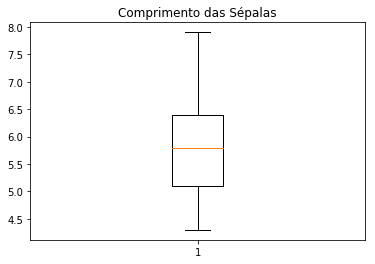

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Comprimento das Sépalas')
ax1.boxplot(iris['sepal_length'])
plt.show()

A função `boxplot` pode receber vários parâmetros diferentes de configuração de como ela deverá funcionar. A forma usada acima é a mais direta e a mais simples. Para mais informações veja a [documentação da função boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html).

Para praticar, desenhe o gráfico *boxplot* para os quatro atributos numéricos do dataset Iris.


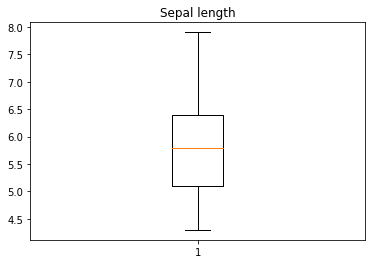

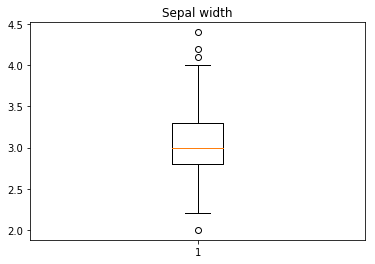

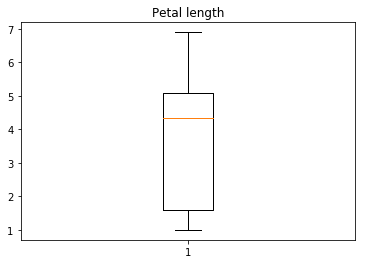

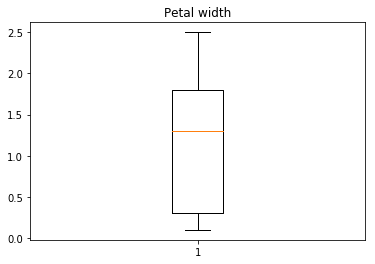

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sepal length')
ax1.boxplot(iris['sepal_length'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Sepal width')
ax1.boxplot(iris['sepal_width'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Petal length')
ax1.boxplot(iris['petal_length'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Petal width')
ax1.boxplot(iris['petal_width'])
plt.show()

### 3.2 Tabelas de Frequência e Hitogramas

Uma **tabela de frequência** de uma variável divide o intervalo de variáveis em segmentos igualmente espaçados e nos informa quantos valores caem em cada segmento. Em Python, uma tabela de frequência pode construída com a função `histogram` da biblioteca NumPy, como mostra o exemplo abaixo.

In [18]:
bins, bin_edges = np.histogram(iris['sepal_length'], bins = 8)

O código acima cria divide a série de valores do atributo `sepal_length`, em oito intervalos iguais e retorna a contagem de quantos valores cairam em cada segmento da variável `bins`, e os limites entre os intervalos na variável `bin_edges`. Deste modo a variável `bins` terá 8 valores e a variável `bin_edges` terá 9. O código abaixo imprime a tabela de frequência.

In [19]:
bins, bin_edges = np.histogram(iris['sepal_length'], bins = 8)
print("bins      => %s" % str(bins))
print("bin_edges => %s" % str(bin_edges))
print()

bin_ranges = list(zip(bin_edges, bin_edges[1:]))

print("Bin Range\t Count")
for i in range(8):
    ini, fin = bin_ranges[i]
    print("%3.2g--%3.2g\t %d" % (ini, fin, bins[i]))

bins      => [11 30 24 24 31 17  7  6]
bin_edges => [4.3  4.75 5.2  5.65 6.1  6.55 7.   7.45 7.9 ]

Bin Range	 Count
4.3--4.8	 11
4.8--5.2	 30
5.2--5.7	 24
5.7--6.1	 24
6.1--6.6	 31
6.6--  7	 17
  7--7.5	 7
7.5--7.9	 6


A mesma informação pode ser exibida de modo gráfico utilizando-se a função `hist` 

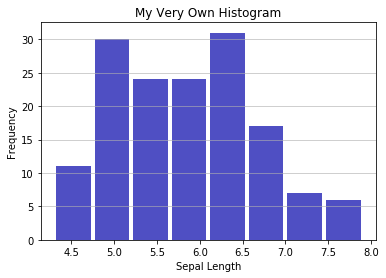

In [20]:
plt.hist(iris['sepal_length'], bins=8, color='#0504aa', alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.show()

Assim como a função *boxplot*, a função `hist` possui diversos parâmetros que podem ser usados para configurá-la. Para mais informações veja a [documentação da função hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

### 3.3 Estimativas de Densidade

Um **gráfico de densidade** (*density plot*) mostra a distribuição dos valores de dados como uma linha contínua. É um gráfico relacionado ao *histograma* e os dois são frequentemente mostrados juntos.

Infelizmente a biblioteca matplotlib não dispõe de uma forma conveniente de desenhar o gráfico de densidade, mas existe uma forma simples de gerar este gráfico através da biblioteca [seaborn](https://seaborn.pydata.org), utilizando a função `distplot`.

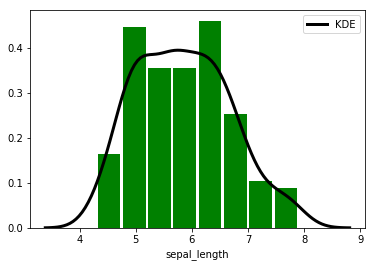

In [21]:
import seaborn as sns

sns.distplot(iris['sepal_length'], bins=8, 
             kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 1, "color": "green", "rwidth": 0.9})
plt.show()

Para mais informações sobre os parâmetros e o uso da função `distplot` consulte a [documentação da função distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html).

Para praticar, desenhe abaixo o gráfico de densidade para os quatro atributos numéricos do dataset Iris.


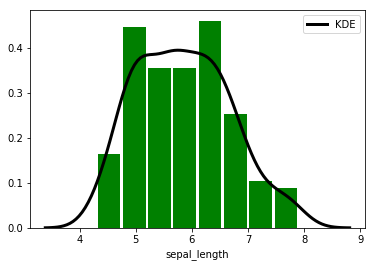

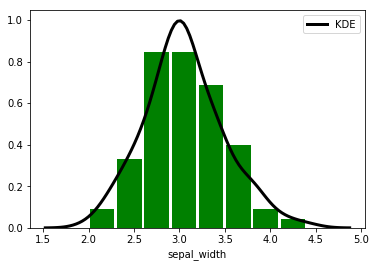

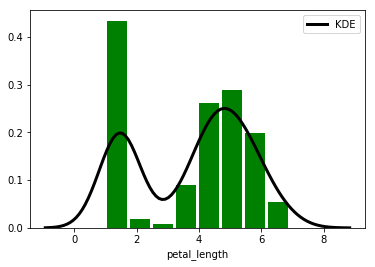

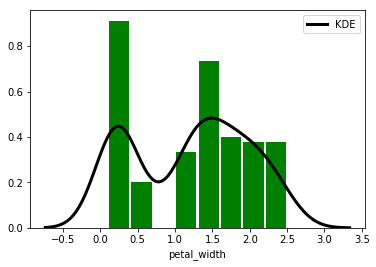

In [22]:
# Desenhe os gráficos de densidade ...
sns.distplot(iris['sepal_length'], bins=8, 
             kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 1, "color": "green", "rwidth": 0.9})
plt.show()

sns.distplot(iris['sepal_width'], bins=8, 
             kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 1, "color": "green", "rwidth": 0.9})
plt.show()

sns.distplot(iris['petal_length'], bins=8, 
             kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 1, "color": "green", "rwidth": 0.9})
plt.show()

sns.distplot(iris['petal_width'], bins=8, 
             kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 1, "color": "green", "rwidth": 0.9})
plt.show()

## 3.3 Explorando dados Binários e Categóricos

Para dados binários e categóricos vimos dois indicadores, *moda* e *valor esperado*, e dois tipos de gráficos, *gráfico de barras* e *gráfico de torta*, que ajudam na análise destes tipos de dados. Vermos com calcular ou gerar estes elmentos em Python.

Para a determinação da *moda*, i.e., do valor que ocorre com mais frequência em um conjunto de dados, podemos usar o método `value_counts` que retorna, para cada valor, quantas vezes aquele valor ocorrer, ou podemos usar diretamente o método `mode`, que retorna diretamente a moda. Como mostrado nos exemplos abaixo.

In [23]:
iris['sepal_length'].value_counts().head()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
Name: sepal_length, dtype: int64

In [24]:
iris['sepal_length'].mode()

0    5.0
dtype: float64

In [25]:
iris['sepal_length'].value_counts().index[0] == iris['sepal_length'].mode()

0    True
dtype: bool

**Exercício.** Calcule e imprima a moda de cada um dos quatro atributos numéricos do dataset Iris.

In [26]:
# Calcule a moda ...
sepal_length_mode = iris['sepal_length'].mode()
sepal_width_mode = iris['sepal_width'].mode()
petal_length_mode = iris['petal_length'].mode()
petal_width_mode = iris['petal_width'].mode()

print('Sepal length mode:', sepal_length_mode)
print('Sepal width mode:', sepal_width_mode)
print('Petal length mode:', petal_length_mode)
print('Petal width mode:', petal_width_mode)

Sepal length mode: 0    5.0
dtype: float64
Sepal width mode: 0    3.0
dtype: float64
Petal length mode: 0    1.5
dtype: float64
Petal width mode: 0    0.2
dtype: float64


Para o cálculo do **valor esperado** implementa-se a *fórmula* diretamente em Python.

Para exemplificar o uso de **gráficos de barras** e **gráficos de torta**, vamos calcular a quantidade de registros de cada espécie de flor presentes no dataset Iris.

In [27]:
freq = iris['species'].value_counts()
freq

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

OK, então temos exatamente o mesmo número de registros para cada tipo de flor. Mas ainda assim queremos plotar o **gráfico de barras**. Podemos gerar esse gráfico com o comando `bar` da biblioteca *matplotlib*, conforme mostrado abaixo.

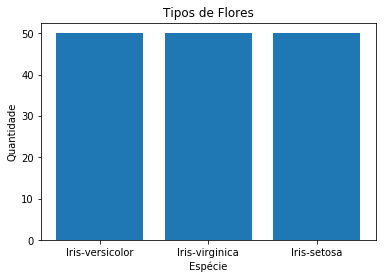

In [28]:
plt.bar(freq.index, freq)
plt.title("Tipos de Flores")
plt.xlabel("Espécie")
plt.ylabel("Quantidade")
plt.show()

Para mais informações sobre parâmetros e uso da função `bar` consulte a [documentação da função](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) no site do *matplotlib*.

Para apresentar a mesma informação na forma de um **gráfico de torta** podemos usar a função `pie` do *matplotlib*. O exemplo abaixo mostra o pedaço correspondente à espécie *Iris Virginica* destacado (explodido) em relação aos demais (apenas a título de ilustração).

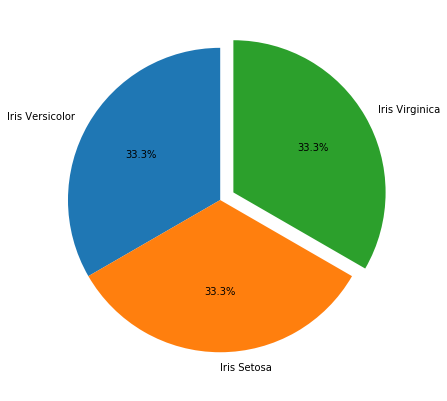

In [29]:
plt.figure(figsize=(7,7))
plt.pie(freq, 
        labels=['Iris Versicolor', 'Iris Setosa', 'Iris Virginica'], 
        explode=[0, 0, 0.1],
        startangle=90, 
        autopct='%1.1f%%')
plt.show()

Para mais informações sobre a geração de gráficos de torta com o matplotlib consulte a [documentação da função pie](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html).

## 3.4 Correlações

Para a análise de correlações, existem várias ferramentas já disponíveis em Python. Para o cálculo do *Coefficiente de Correlação de Pearson* (o mais comum), por exemplo, existe a função `corrcoef` na biblioteca NumPy. Podemos vê-la em ação no exemplo abaixo.


In [30]:
d1 = np.array([[  0.1, 0.5,  1.1, 1.6,  1.9,  2.5, 3.0,  3.55, 3.95],
               [-0.05, 0.45, 1.3, 1.45, 2.05, 2.6, 2.85, 3.6,  4.1]])
np.corrcoef(d1)

array([[1.        , 0.99519263],
       [0.99519263, 1.        ]])

A função `corrcoef` recebe um array bidimensional e calcula a matriz de correlações. No exemplo acima, foi criado um array com duas variáveis, e como esperado a matriz retornada foi uma matrix 2×2. Se desejarmos um coeficiente específico, basta acessar a linha correspondente da matriz.

Para DataFrames em Pandas, existe um método chamado `corr` que realiza a mesma operação, i.e., calcula a matriz de correlações do DataFrame. Digamos que queremos analisar se existe uma correlação linear entre os atributos numéricos do dataset Iris, o código que calcula a **matriz de correlações** entre os atributos é:

In [31]:
iris_num = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_corr = iris_num.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Como é possível ver, existem correlações fortes entre os atributos `sepal_length` e `petal_length` (0.87), entre `sepal_length` e `petal_width` (0.82), e entre `petal_length` e `petal_width` (0.96). Mas não existe correlação forte entre `sepal_width` e nenhum dos outros atributos.

Uma outra forma de visualizar a *matriz de correlações* é através do gráfico de correlações (que na verdade é um *mapa de calor*). O exemplo abaixo mostra como esse tipo de gráfico pode ser construído.

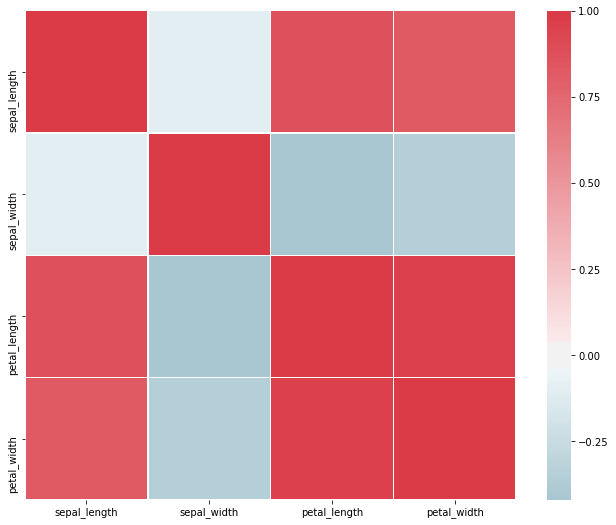

In [32]:
# Define o tamanho do gráfico
f, ax = plt.subplots(figsize=(11, 9))

# Gera um mapa de cores divergente
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Desenha o mapa de calor para a matriz de correlações
sns.heatmap(iris_corr, cmap=cmap, center=0, linewidths=0.5)

Uma outra forma de tentar visualizar correlações entre variáveis é através do **gráfico de dispersão** (*scatter plot*). Esse gráfico pode ser obtido através da função `scatter` do *matplotlib*, como mostrado no exemplo abaixo.

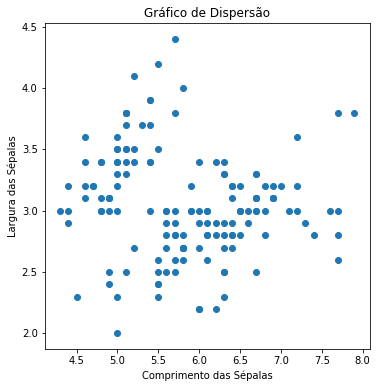

In [33]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(iris['sepal_length'], iris['sepal_width'])
ax.set_title('Gráfico de Dispersão')
ax.set_xlabel('Comprimento das Sépalas')
ax.set_ylabel('Largura das Sépalas')

# Ajusta o aspecto para o gráfico ficar quadrado
ax.set_aspect(1.5)

plt.show()

**Exercício.** Desenhe os gráficos de dispersão para os seguintes pares de atributos:
- sepal_length vs. petal_length
- sepal_length vs. petal_width
- petal_length vs. petal_width

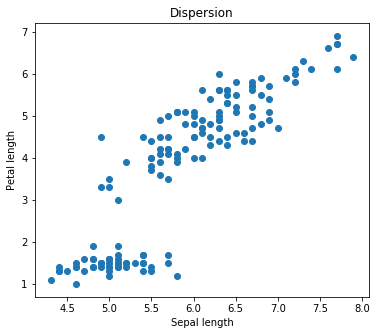

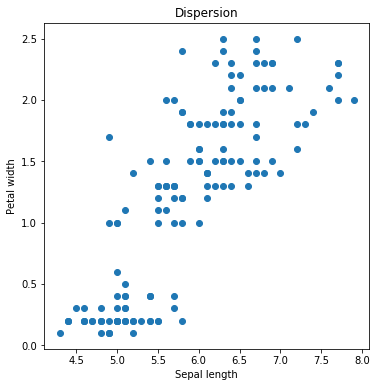

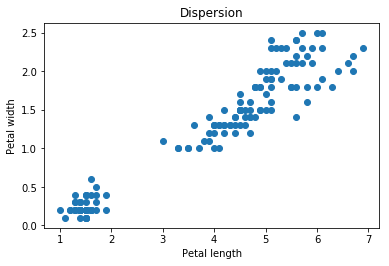

In [34]:
# Desenhe os gráficos de dispersão ...
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(iris['sepal_length'], iris['petal_length'])
ax.set_title('Dispersion')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_aspect(0.5)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(iris['sepal_length'], iris['petal_width'])
ax.set_title('Dispersion')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal width')
ax.set_aspect(1.5)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(iris['petal_length'], iris['petal_width'])
ax.set_title('Dispersion')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_aspect(1.5)
plt.show()

Existe uma forma mais conveniente de visualizar vários gráficos de dispersão simultaneamente. A biblioteca *seaborn* define uma função chamada `pairplot` que se assemelha, em propósito, a uma matriz de dispersão. A função `pairplot` cria uma matriz onde cada célula é um gráfico de dispersão do par de atributos correspondente àquela célula. Se a célula estiver na diagonal principal, é plotado um histograma ao invés do gráfico de dispersão.

O exemplo abaixo ilustra o uso da função `pairplot` sobre o dataset Iris. Note que o atributo *species*, que não é numérico, foi ignorado no gráfico.


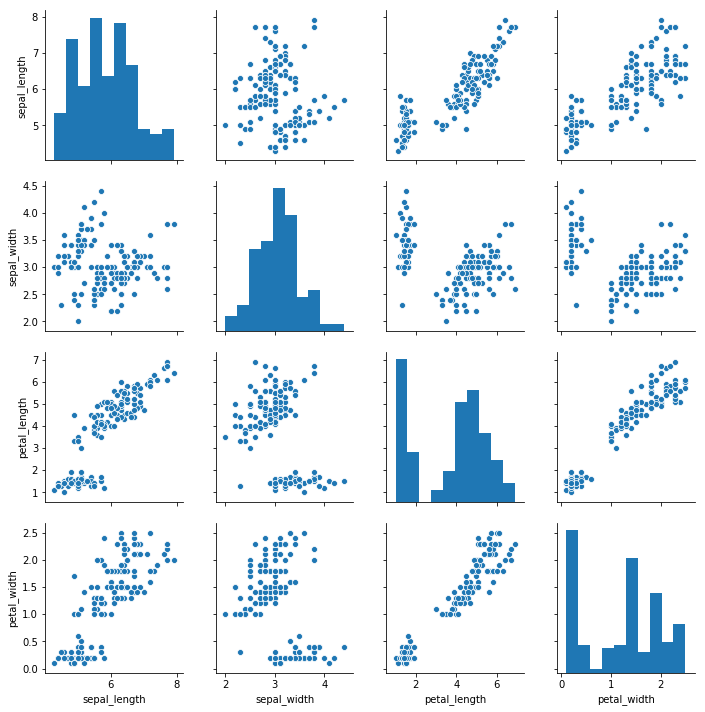

In [35]:
sns.pairplot(iris)
plt.show()

<br>
<br>

E isso encerra esta etapa de exercício.


In [36]:
print(':)')

:)
